# Visualizing Mnist Dataset

https://www.kaggle.com/oddrationale/mnist-in-csv?select=mnist_train.csv

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("mnist_test.csv") # We are using test data , if we have used train data then we have to take out 0.2 for test and 0.8 for training 
print(df.shape)
df.head(n=3)

(10000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = df.values
np.random.shuffle(data) # shuffled the data values as for testing or training it may be possible we just test or trained the 
# model on sorted data which can cause problems
print(data)

[[5 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [7 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [4]:
X = data[:,1:] # X contain image data
Y = data[:,0] # Y contains label of the images
print(X,Y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [5 5 0 ... 7 1 0]


In [5]:
def show(index):
    plt.subplot(5,5,index+1)
    plt.subplots_adjust(hspace=0.5)
    plt.imshow(X[i].reshape(28,28),cmap="gray") # showing the images ,  We reshpae image data as mnist store image data as one D array and to show image mnist has image in 28X28 so we reshape it to get original image 
    plt.title(f"Label {Y[i]}")
    plt.axis("off") # to remove the axes data

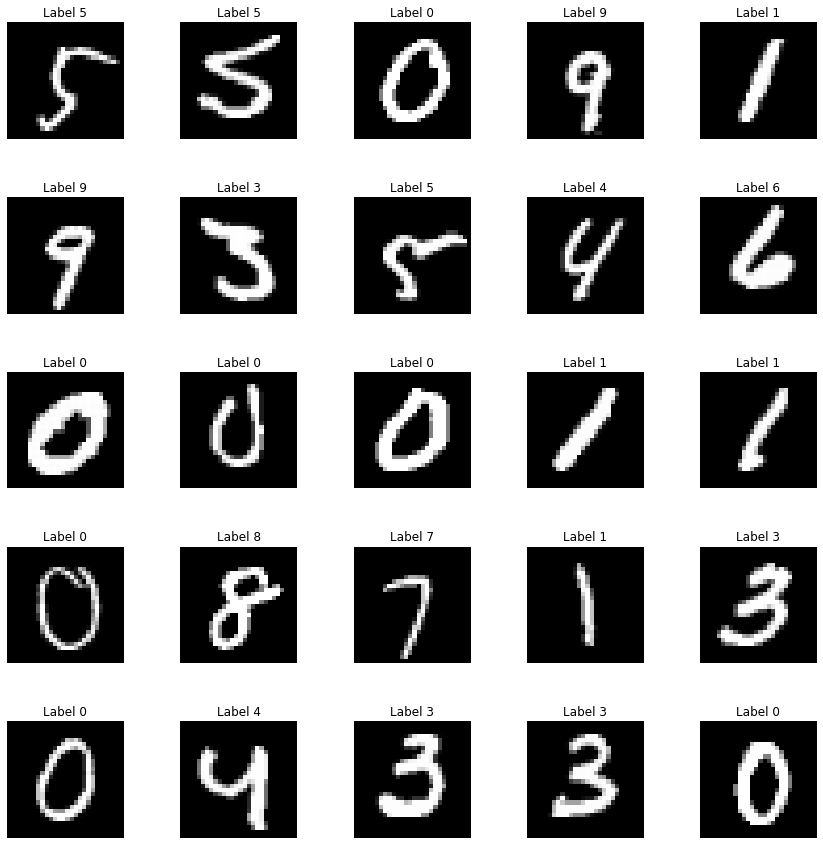

In [6]:
plt.figure(figsize=(15,15))
for i in range (25):
    show(i)

# Predicting the Number image from Mnist Dataset using KNN

In [68]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2)) #finding the eucledian distance 

def knn(X,Y,query,k=5):
    vals = []
    for i in range(len(X)):
        vals.append((dist(query,X[i]),Y[i])) # appending distance and label of the image query point tested against

    vals = sorted(vals) # sorted the values
    vals = vals[:k] # took first k values 
    new_vals = np.array(vals) 
    new_vals = np.unique(new_vals[:,1],return_counts=True) # counts of all the unique lables
    index = new_vals[1].argmax() # taking the label having maximum count
    counts = new_vals[1][index] 
    yes = (counts/k)*100 # calculating percentage of correct pediction
    return (new_vals[0][index],yes)

In [69]:
prediction = knn(X,Y,X[21],200)
print(f"The image {prediction[1]}% is {prediction[0]}")

The image 71.0% is 4.0


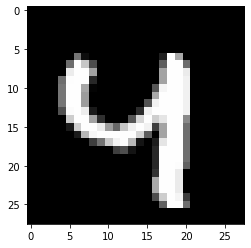

In [67]:
plt.imshow(X[21].reshape(28,28),cmap="gray")
plt.show()